# K-Means Clustering

Implementing K-means Clustering
Your task is to implement parts of the K-means clustering algorithm from scratch (i.e., without importing any libraries or packages for K-means). K-means clustering is an unsupervised learning algorithm comprised of three major steps:

1. Initialize centroids: Choose k centroids randomly from the data points or initialize them using a heuristic method.
2. Assign points to clusters: For each data point, calculate the distance to each centroid and assign the point to the cluster with the closest centroid.
3. Update centroids: Calculate the new centroids as the mean of all points in each cluster.
4. This process is repeated until convergence, i.e., when the centroids do not change significantly or the assignments of data points remain the same.

You will be given a 2D array of float values, data_points, representing the data to be clustered. Each subarray represents a unique point in the dataset. You are also given k, the number of clusters to form.

Your goal is to implement the following functions to complete the K-means algorithm:

1. Calculate Distance: For this task, use Euclidean distance as the distance metric.
2. Initialize Centroids: Randomly choose k points from data_points as the initial centroids.
3. Assign Clusters: Assign each data point to the cluster with the closest centroid.
4. Update Centroids: Calculate new centroids by finding the mean of the points assigned to each cluster.
5. You are also required to implement an iterative solution that continues until convergence or for a given number of iterations.



In [44]:
import random
import numpy as np

example_points = np.random.rand(200, 3).tolist()

k = 3


skeleton code:

In [45]:



# Step 1: Calculate distance metric
def euc_dist(point1:list[float], point2:list[float]) -> float:
    return np.sqrt(sum((a-b)**2 for a, b in zip(point1, point2)))

# Step 2: Initialize centroids
def initialize_centroids(data_points:list[list[float]], k:int) -> list[list[float]]:
    if k < len(data_points):
        return random.sample(data_points, k)
    else:
        raise ValueError("Cannot perform K-means with k greater than the number of data points.")

# Step 3: Assign clusters to points
def assign_clusters(data_points:list[list[float]], centroids:list[list[float]]) -> list[list[float]]:
    clusters = [[] for _ in range(len(centroids))]
    for point in data_points:
        #find the nearest cluster:
        distances = [euc_dist(point,centroid) for centroid in centroids]
        nearest_centroid_idx = distances.index(min(distances))
        clusters[nearest_centroid_idx].append(point)
    return clusters

# Step 4: Update centroids
def update_centroids(clusters:list[list[float]]) -> list[list[float]]:
    
    # for each cluster, get the average centroid and update the centroids with the new clusters
    new_centroids = []

    for cluster in clusters:
        if len(cluster) == 0:
            continue
        new_centroid = np.mean(cluster, axis=0).tolist()
        new_centroids.append(new_centroid)

    return new_centroids

# Step 5: Iterate until convergence
def k_means(data_points: list[float], k:int , max_iterations:int=100):
    # Initial centroids
    centroids = initialize_centroids(data_points, k)
    for _ in range(max_iterations):
        # Assign points to nearest cluster
        clusters = assign_clusters(data_points, centroids)
        
        # Calculate new centroids
        new_centroids = update_centroids(clusters)
        
        # Check for convergence (if centroids do not change)
        if new_centroids == centroids:
            break
            print('Converged')

            
        centroids = new_centroids
        
    return centroids, clusters


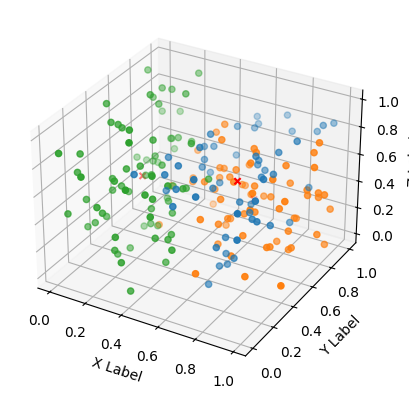

In [46]:
# display them in 3D
import matplotlib.pyplot as plt

centroids, clusters = k_means(example_points, k, 10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
for cluster in clusters:
    cluster = np.array(cluster)
    if cluster.shape[1] >= 3:
        ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2])
    else:
        ax.scatter(cluster[:, 0], cluster[:, 1])

# Plot the centroids
centroids = np.array(centroids)
if centroids.shape[1] >= 3:
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x')
else:
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()